Instituto Politécnico Nacional

Centro de Investigación en Computación

Minería de datos I

Programación de algoritmos de Clustering.
1. KMeans
1. KMedianas

Presenta: Ana Maritza Bello

---

# Implementación de KMeans

## Introducción
Para la implementación de KMeans se utilizó el lenguaje de programación Python,
en su versión 3.7.4. Se utilizó la librería de Numpy para el manejo de arreglos
y operaciones matemáticas, y la librería de Matplotlib para la visualización de
los resultados.

# Dataset

El conjunto de datos utilizado para la implementación de KMeans es el conjunto
de trayectorias de albatros de Laysan en el Pacífico Norte utilizado en las
presentaciones anteriores. La idea es agrupar los puntos de las trayectorias en
clusters que representen los lugares de nicho ecológico de los albatros.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv('../data/trajectories.csv')
data = data.drop(['id'],axis = 1)

df = pd.DataFrame(data)

In [20]:
df['month'] = df['date'].apply(lambda x: x.split('-')[1])
df['month'] = df['month'].astype(int)
df['year'] = df['date'].apply(lambda x: x.split('-')[0])
df['year'] = df['year'].astype(int)

In [21]:
from sklearn.model_selection import train_test_split

# Multitarget array
y = df[['longitude', 'latitude']].values

# Features
cols_to_drop = ['latitude', 'longitude', 'name', 'date']
X = df.drop(cols_to_drop, axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(" X_train shape: ", X_train.shape, "\n",
      "y_train shape: ", y_train.shape, "\n",
      "X_test shape: ", X_test.shape, "\n",
      "y_test shape: ", y_test.shape)

 X_train shape:  (141413, 7) 
 y_train shape:  (141413, 2) 
 X_test shape:  (35354, 7) 
 y_test shape:  (35354, 2)


# Detalles de la implementación

El algoritmo de Kmeans toma como parámetros de entrada el número de clusters
deseados y el número máximo de iteraciones. El algoritmo se ejecuta hasta que
se alcance el número máximo de iteraciones o hasta que los centroides de los
clusters no se muevan de posición.

Algo que se debe tomar en cuenta es que el algoritmo de KMeans es sensible a la
inicialización de los centroides, por lo que se debe tener cuidado al elegir
los centroides iniciales. En este caso, se eligieron los centroides iniciales
de manera aleatoria.

La métrica utilizada para medir la distancia entre los puntos y los centroides
fue la distancia euclidiana.

El número de clusters se eligió de manera arbitraria, pero se puede utilizar
algún método para determinar el número de clusters óptimo, como por ejemplo el
método del codo.

El método del codo consiste en graficar el número de clusters vs la suma de las
distancias al cuadrado de los puntos a sus centroides más cercanos. El número
de clusters óptimo es aquel en el que la suma de las distancias al cuadrado
empieza a disminuir de manera más lenta.

In [22]:
from scipy.cluster.hierarchy import linkage, fcluster

coordinates = df[['longitude', 'latitude']].values
coordinates = coordinates[::100]
coordinates = pd.DataFrame(coordinates, columns=['longitude', 'latitude'])

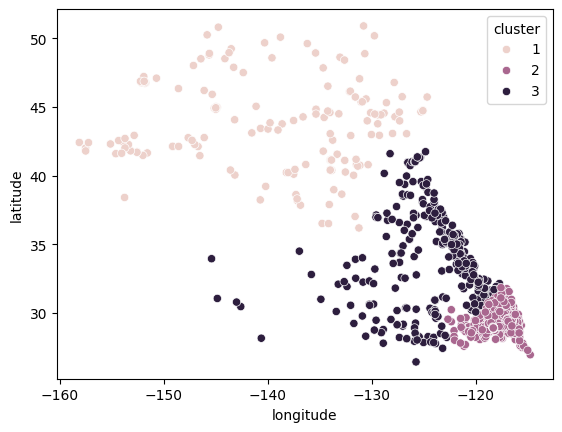

In [23]:
Z = linkage(coordinates, method='ward', metric='euclidean')
coordinates['cluster'] = fcluster(Z, 3, criterion='maxclust')

sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=coordinates)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='longitude', ylabel='latitude'>

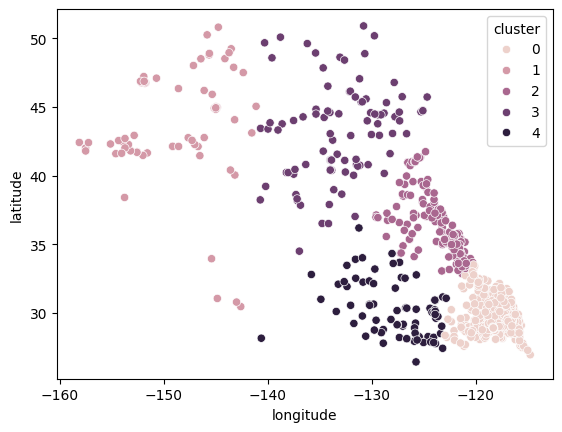

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(coordinates)
coordinates['cluster'] = kmeans.predict(coordinates)

sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=coordinates)


# Conclusiones

Particularmente en este conjunto de datos, el algoritmo de KMeans es útil para
estimar áreas de nicho ecológico de los albatros, ya que con un análisis más a
detalle utilizando las variables oceanográficas se puede determinar si los
clusters encontrados corresponden a zonas de alimentación, descanso o migración.